**Entrada:** Conjunto $A$ con $n$ números y un entero $i$, con $1 \leq i\leq n$

**Salida:** El i-ésimo elemento del conjunto $A$

#1. Descripción del problema

En la rama de la estadística, es muy importante obtener ciertos valores, como el mínimo y máximo valor de una muestra, la mediana u otros cuantiles de muestra. Entre ellos se encuentra el estadístico de orden $i$, que corresponde al i-ésimo valor más pequeño de una muestra estadística.

# 2. Descripción del algoritmo

El algoritmo **Select** nos permite encontrar el i-ésimo elemento de un arreglo. El algoritmo en cuestión utiliza diversas funciones, incluso un metodo de ordenamiento. Primero se especifica el elemento a buscar, que vendría siendo nuestro $i$, luego se busca un pivote óptimo para el arreglo, para ello se utiliza la función **PivoteSelection**.

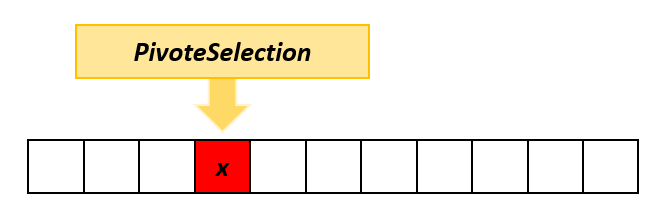



Una vez obtenido nuestro pivote se hace uso de la función **Partition**, esta se centra en ordenar los elementos del arreglo dejando los valores menores o iguales al pivote a la izquierda y los mayores a la derecha.

Si $i == q$, siendo $q$ el índice, se retorna el valor del pivote, que corresponde a nuestro i-ésimo elemento que estamos buscando. Si $i < q$ se continua por el lado izquierdo del arreglo, de lo contrario se continua por la derecha. Como se muestra en la imagen

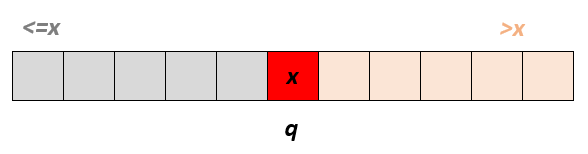





**Pivote-selection:**

Se divide el arreglo de entrada en grupos de 5 elementos, luego se ordena cada subarreglo con el algoritmo **InsertionSort**. Una vez ordenados, se copian las medianas de cada subarreglo en otro arreglo. Ahora obtenemos la mediana del arreglo de medianas, para ello en esta ocasión se utiliza la misma función **Pivote-selection** de manera recursiva. La mediana de las medianas corresponderá a nuestro pivote para particionar nuestro arreglo.


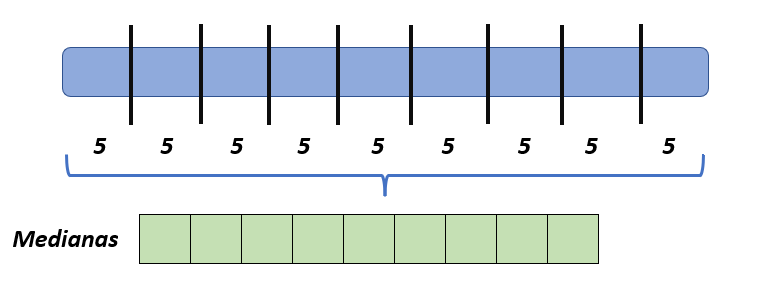

## Ejemplo:

Supongamos que tenemos el arreglo $A = [2,7,1,8,9]$

utilizamos la funcion pivote-selection para obtener un pivote adecuado.

**pivote-Selection:**

separamos el arreglo en subarreglos de 5 elementos, en esta caso solo es uno. Luego lo ordenamos utilizando **InsertionSort**, Nos queda:

$[1,2,7,8,9]$

Obtenemos la mediana: 7

lo agregamos en nuestro arreglo de medianas.

Ahora obtenemos la mediana de las medianas, en este caso solo es uno, por lo tanto retorna 7

Ahora ocupamos el valor 7 como pivote para la función **Partition**. Nos queda el mismo arreglo $[1,2,7,8,9]$

Comparamos si 7 es igual a nuestro i-ésimo elemento. Como no lo es seguimos en el subarreglo de la izquierda. $[1,2]$

Seguimos los pasos anteriores y nos queda que 2 es igual al i-ésimo elemento a buscar, por lo tanto retorna 2




# 3. Código

In [148]:
import random
from termcolor import colored
import copy

def insertion_sort(a):
  n = len(a)
  for i in range (1,len(a)):
    key = a[i]
    for k in range (i - 1,-1,-1):
      if a[k] < key:
        a[k + 1] = key
        break
      a[k + 1] = a[k]
      a[k] = key
    if key < a[0]:
      a[0] = key

  return a


def partition (A, piv):


  min = 0
  max = len(A)-1
  i = 0
  pivIndex = -1
  for k in range (0, len(A)):

    if (A[k] <= piv):
      A[i], A[k] = A[k], A[i]
      i += 1
      #Encontrar la posición del pivote
      if (A[i-1] == piv):
        pivIndex = i-1


  A[i-1], A[pivIndex] = A[pivIndex], A[i-1]
  return i-1


def pivotSelection(A,low,high):
  opcion = False
  A = A[low:high]
  if (len(A) == 1):
    aux = A[0]
    return aux

  medianas = []
  cant_divisiones = len(A) // 5
  if cant_divisiones == 0:
    cant_divisiones = 1

  if cant_divisiones % 5 != 0:
    opcion = True

  i = 0
  while i < cant_divisiones:
    subArreglo = insertion_sort(A[i*5:(i+1)*5])
    median = subArreglo[len(subArreglo) // 2]
    medianas.append(median)
    i += 1


  if opcion == True: 
    subArreglo = insertion_sort(A[i*5:])
    if len(subArreglo) != 0:
      median = subArreglo[int(len(subArreglo) / 2)]
      medianas.append(median)

  return pivotSelection(medianas,low,len(medianas))


def select(A,low,high,i):
  pivote = pivotSelection(A,low,high)
  q = partition(A,pivote)
  

  if (q == i-1):
    return A[q]
  elif ((i-1) < q):
    return select(A,low,q,i)
  else:
    return select(A,q+1,high,i)

A = [4,7,1,0,5,8,12,6,2,14,9]
low = 0
high = len(A) 
valor = select(A,low,high,3)
print("i-ésimo elemento:",valor)

i-ésimo elemento: 2


# 4. Tiempo de ejecución

$Lema:$ el tiempo de ejecución del algoritmo Select es de complejidad $O(n)$. 

Iremos analizando paso a paso el recorrido que realiza el algoritmo para establecer una relación de recurrencia:

* Primero el algoritmo Pivot-Selection busca la mediana de las medianas, sabiendo cómo funciona esto podemos decir que está definida como $T(n/5)$.

* El algoritmo Partition tiene una complejidad de tiempo $O(n)$.

Para determinar la función recursiva que se genera en Select al separar el arreglo en dos casos, si no se ha encontrado el k-ésimo dato al finalizar Partition debemos saber que:

* Al menos la mitad de las medianas que se encontraron en Pivot-Selection son mayores o igual que la mediana verdadera obtenida al finalizar este algoritmo. Esto nos dice que como mínimo la mitad de los grupos de medianas aportan 3 datos mayores que la mediana verdadera, con excepción del último grupo, ya que este tiene a lo más 5 elementos. A partir de lo anterior surge la siguiente proporción.

      [1/2 * n/5]*3 => 3n/10


* Dado que al menos tres elementos son mayores que la mediana verdadera, nos indica que la función se repite a lo más 7n/10 veces.

      n - 3n/10 => 7n/10


Con esto claro podemos establecer que la relación de recurrencia para el algoritmo completo es:

    T(n) = T(n/5) + T(7n/10) + O(n)

Para probar que el tiempo de ejecución es $O(n)$ se debe aplicar sustitución, puesto que cualquier otro método sería inconveniente o no resultaría.

    T(n) <= cn/5 + 7cn/10 + dn

    T(n) <= 9cn/10 + dn => O(n)

En conclusión, el algoritmo Select tiene complejidad temporal $O(n)$, también se puede apreciar que tiene constantes muy grandes, debido al proceso de escoger la mediana verdadera y las particiones que realiza.


# 5. Correctitud

**Inducción matemática**

Para probar la correctitud, utilizaremos el metodo de inducción matemática, básicamente consisten en que si queremos probar alguna declaración $P(n)$ debemos probar un par de condiciones.

1. Probar un caso base para $P(n)$ como $P(1)$
2. Probar que si $P(m)$ es verdad para m < n, entonces P(n) también lo es.

Consideremos un caso base de $P(1)$ cuando solo hay un elemento en nuestro subarreglo, en ese caso nuestro i-ésimo elemento más pequeño corresponderá al unico elemento presente.

Cuando obtenemos el pivote y lo comparamos con nuestro i-ésimo elemento a buscar, en caso de que no corresponda se particiona el arreglo. Si el i-esimo elemento es menor al pivote se continua por el subarreglo de la izquierda, si el i-ésimo elemento es mayor al pivote se continua por la derecha. Con esto se minimiza el tamaño de cada subarreglo $m$ con cada llamada recursiva, cumpliendo la condición de P(m) es verdad para m < n

Con lo anteriormente comprobado, podemos concluir que la correctitud para el algoritmo **Select** es correcta.




# 6. Experimentos

A continuación compararemos los algoritmos **Selection** y **Randonmized-Select**, para ello estableceremos un tamaño del problema de $n \in [5,499], con valores entre 1 y 500


In [142]:
def RandomSelection (A):
  #Escoger un número aleatorio del arreglo
  randNum = random.choice(A)
  #Devolver el pivote.
  return randNum

def r_selection(A, i):
  #Encontrar un pivote.
  piv = RandomSelection(A)

  #Reorganizar el arreglo con Partition y obtener la posición del pivote.
  pivIndex = partition(A, piv)

  #Verificar si el pivote es el estadístico de orden buscado.
  if (pivIndex == i-1):
    return A[pivIndex]
  if (i-1 < pivIndex):
    return select(A,low,piv,i)
  if (i-1 > pivIndex):
    return select(A,piv+1,high,i)

  #Retornar el estadístico de orden.
  return A

In [147]:
import random
from matplotlib import cm
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,200):

  a = random.sample(range(1, 240), n)
  i = random.randint(0,len(a)-1)
  low = 0
  high = len(a)

  t = repeat(setup="from __main__ import select", stmt=f"select({a},{low},{high},{i})", repeat=1, number=10)
  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.legend(["asd"])


plt.xlabel('tamaño del arreglo')
plt.ylabel('Tiempo')
plt.show()

IndexError: ignored